# Credit Card Transaction Fraud Detection (Mini Project)
Detection of fraud in credit card transactions (2013, European cardholders) based on data obtained from Kaggle.com (https://www.kaggle.com/mlg-ulb/creditcardfraud) through the Machine Learning Group – ULB. Dataset size of 284,807. Dataset was found to be imbalanced (pre-processed by scaling, distributing, data split), therefore over-sampling (SMOTE) must be done to compensate. 

## Project Outline 

1. [Load Data & Pre-Processing](#dataprep)
2. [Synthetic Minority Over-Sampling Technique (SMOTE)](#smote)
3. [Neural Network Under- and Over-Sampling Comparison](#neural)
4. [Conclusion](#conclusion)

<a name='dataprep'> </a>

# 1. Load Data & Pre-Processing

Dataset file is uploaded and read. Data is evaluated on the surface level to figure out the layout of data (skewness), if any. Dataset is then scaled for uniformity across values, to allow better evaluations on correlations. Dataset is split into train-test.

In [4]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
plt.style.use('bmh')



In [5]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#Overview of dataset values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
#null value check
df.isnull().sum().max()

0

In [8]:
#check available columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
#check data types
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Percentage of transaction which are not fraudulent: 99.83%
Percentage of transaction which are fraudulent: 0.17%


Text(0.5, 1.0, 'Distributions of Not Fraud (0) and Fraud (1)')

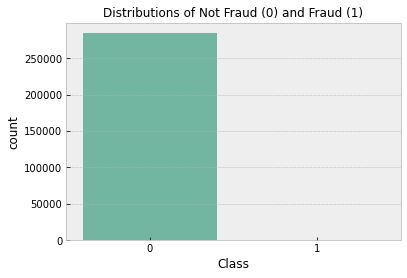

In [10]:
#count number (percentage) of "fraud" vs "not fraud" data
nofraud = round(df['Class'].value_counts()[0]/len(df) * 100,2)
fraud = round(df['Class'].value_counts()[1]/len(df) * 100,2)

print("Percentage of transaction which are not fraudulent: {}%".format(nofraud))
print("Percentage of transaction which are fraudulent: {}%".format(fraud))

#data is skewed, most of the data are considered not fraudulent. Visualized below.

sns.countplot('Class', palette = "Set2", data= df)
plt.title("Distributions of Not Fraud (0) and Fraud (1)", fontsize =12)

Text(0.5, 1.0, 'Distribution: Amount')

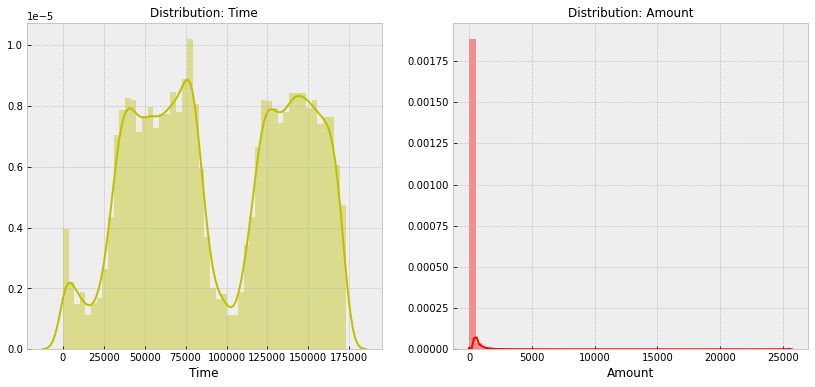

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1 = sns.distplot(df['Time'], ax=ax1, color='y')
ax2 = sns.distplot(df['Amount'], ax=ax2, color='r')
ax1.set_title('Distribution: Time', fontsize=12)
ax2.set_title('Distribution: Amount', fontsize=12)



In [12]:
#scaling "Amount" and "Time", with robust scaler as it is not affected by outliers
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis = 1, inplace = True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis = 1, inplace = True)

df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


<a name='smote'> </a>

# 2. Synthetic Minority Over-Sampling Technique (SMOTE)

Solving the base (imbalanced) dataset by method of creating synthetic data points to compensate for the differences. More information is retained as no data points from the "No Fraud" data is loss due to deletion/removal, however, as the data size increase, more time will be needed for training.

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



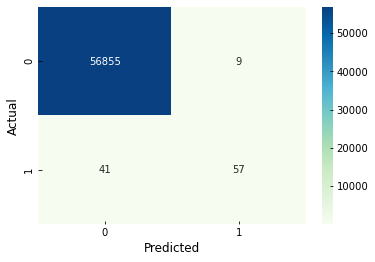

In [13]:
#logistic regression without SMOTE
from sklearn.model_selection import train_test_split as tts

x= df.drop('Class', axis=1)
y=df['Class']

x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
c_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(c_matrix), cmap = "GnBu", annot = True, fmt = 'g')
plt.ylabel('Actual')
plt.xlabel('Predicted')

labels = ['Non-Fraud', 'Fraud']
c_report = classification_report(y_test, y_pred, target_names=labels)

print(c_report)

Resulting LogReg without SMOTE shows a poor model that is highly biased towards the majority in the imbalanced dataset. Low RECALL.

Shape of x_train dataset:  (227845, 30)
Shape of y_train dataset:  (227845,)
Shape of x_test dataset:  (56962, 30)
Shape of y_test dataset:  (56962,)
Before OverSampling, counts label Fraud '1': 0.17292457591783889%
Before OverSampling, counts label Non-Fraud '0': 99.82707542408215% 

After OverSampling, the shape of train_x: (454902, 30)
After OverSampling, the shape of train_y: (454902,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


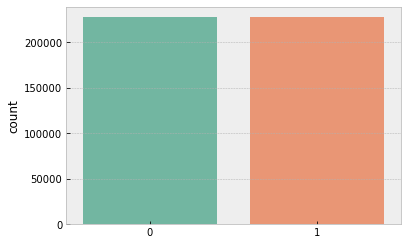

In [14]:
#SMOTE to balance dataset


from imblearn.over_sampling import SMOTE

print("Shape of x_train dataset: ", x_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of x_test dataset: ", x_test.shape)
print("Shape of y_test dataset: ", y_test.shape)



print("Before OverSampling, counts label Fraud '1': {}%".format(sum(y_train==1)/len(y_train)*100.0,2))
print("Before OverSampling, counts label Non-Fraud '0': {}% \n".format(sum(y_train==0)/len(y_train)*100.0,2))

sm = SMOTE(random_state=42)
x_train_s, y_train_s = sm.fit_sample(x_train, y_train.ravel())

print("After OverSampling, the shape of train_x: {}".format(x_train_s.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=df, palette='Set2')



              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



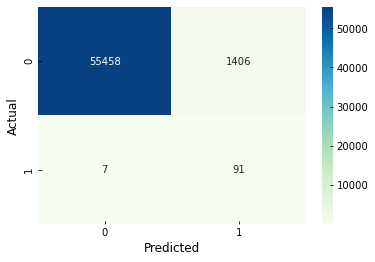

In [14]:
#Logistic Regression with SMOTE


logreg = LogisticRegression()
logreg.fit(x_train_s, y_train_s)
y_pred = logreg.predict(x_test)
c_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="GnBu", fmt='g')
plt.ylabel('Actual')
plt.xlabel('Predicted')

print(classification_report(y_test, y_pred))




Logistic regression failed to classify correctly as alot of non-fraud cases were classified as fraud. High Precision is necessary.

Text(0, 0.5, 'Precision')

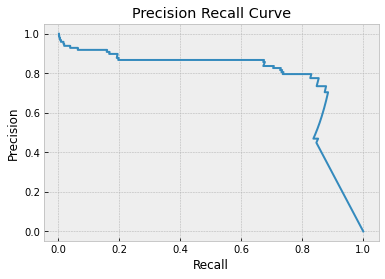

In [15]:
#Precision Recall Curve
y_pred_prob = logreg.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(precision, recall)
plt.title('Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.85      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



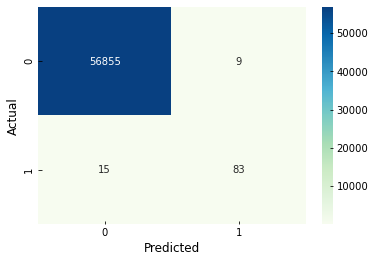

In [16]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as rfc

rand_forest =rfc(n_estimators=1000, 
            min_samples_split=10, min_samples_leaf=1,
            max_features='auto', max_leaf_nodes=None,
            oob_score=True, n_jobs=-1, random_state=1)

rand_forest.fit(x_train_s, y_train_s)
y_pred = rand_forest.predict(x_test)

c_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="GnBu", fmt='g')

plt.ylabel('Actual')
plt.xlabel('Predicted')

print(classification_report(y_test, y_pred))


Text(0, 0.5, 'Precision')

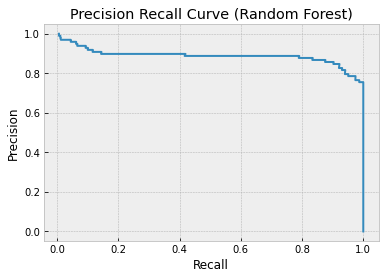

In [17]:
#Precision Recall Curve
y_pred_prob = rand_forest.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(precision, recall)
plt.title('Precision Recall Curve (Random Forest)')
plt.xlabel('Recall')
plt.ylabel('Precision')


Random Forest performs better than Logistic Regression with higher Recall and Precision.

Label/Feature Ranking

1.V14(0.176064)
2.V10(0.135992)
3.V12(0.102772)
4.V4(0.098089)
5.V17(0.081885)
6.V11(0.075734)
7.V3(0.044807)
8.V16(0.040555)
9.V7(0.031162)
10.V2(0.023684)
11.V9(0.020400)
12.V18(0.016443)
13.V5(0.014249)
14.V8(0.013767)
15.V27(0.012314)
16.scaled_amount(0.012044)
17.V21(0.011289)
18.V1(0.010688)
19.V6(0.009269)
20.V19(0.008731)
21.V26(0.007674)
22.scaled_time(0.007079)
23.V20(0.006907)
24.V13(0.006757)
25.V28(0.006066)
26.V15(0.005789)
27.V25(0.005445)
28.V24(0.005204)
29.V23(0.004972)
30.V22(0.004170)


<BarContainer object of 30 artists>

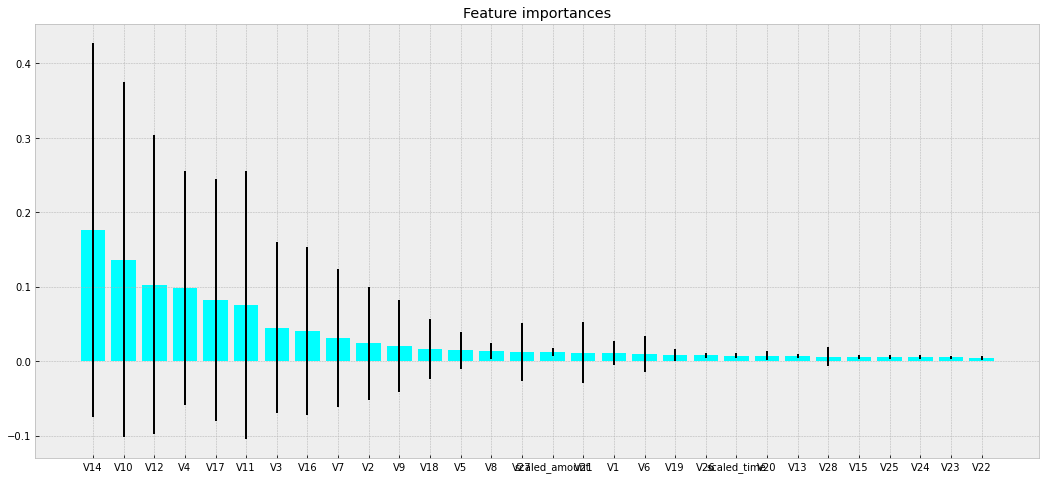

In [19]:
#Label/Feature Ranking, most to least important

print('Label/Feature Ranking\n')

importances = rand_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = df.columns
feature_rank = []

for f in range(x.shape[1]):
    variable = variables[indices[f]]
    feature_rank.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))
    
plt.figure(figsize=(18, 8))
plt.title("Feature importances")
plt.bar(feature_rank, importances[indices],
       color="cyan", yerr=std[indices], align='center')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.85      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



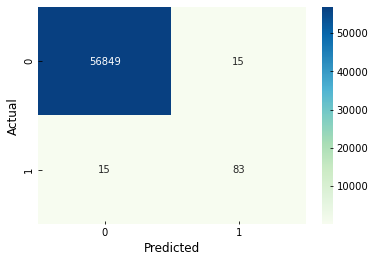

In [20]:
#XGBoost
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators = 5000, max_depth = 30, learning_rate = 0.01)
model.fit(x_train_s, y_train_s)
y_pred = model.predict(x_test)

c_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="GnBu", fmt='g')

plt.ylabel('Actual')
plt.xlabel('Predicted')

print(classification_report(y_test, y_pred))


<a name='neural'> </a>

# 3. Neural Network Under- and Over-Sampling Comparison

1 input layer (nodes = number of features)\
3 hidden layer\
1 output layer (2 output results)\

Optimizer = Adam\
Loss = Binary Cross Entropy\
Activation Function = ReLu, Sigmoid(Output)


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

annmodel = Sequential([
    Dense(input_dim=30, units = 16, activation = 'relu'),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(units=20, activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(units=1, activation='sigmoid')])

annmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 1,933
Trainable params: 1,933
Non-trainable params: 0
____________________________________________________

In [15]:
annmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
annmodel.fit(x_train_s, y_train_s, batch_size=15, epochs=15, verbose=1)

Epoch 1/15
30327/30327 [==============================] - 49s 2ms/step - loss: 0.0352 - accuracy: 0.9880
Epoch 2/15
30327/30327 [==============================] - 48s 2ms/step - loss: 0.0139 - accuracy: 0.9963
Epoch 3/15
30327/30327 [==============================] - 47s 2ms/step - loss: 0.0113 - accuracy: 0.9972
Epoch 4/15
30327/30327 [==============================] - 47s 2ms/step - loss: 0.0096 - accuracy: 0.9977
Epoch 5/15
30327/30327 [==============================] - 50s 2ms/step - loss: 0.0086 - accuracy: 0.9980
Epoch 6/15
30327/30327 [==============================] - 49s 2ms/step - loss: 0.0080 - accuracy: 0.9982
Epoch 7/15
30327/30327 [==============================] - 48s 2ms/step - loss: 0.0077 - accuracy: 0.9983
Epoch 8/15
30327/30327 [==============================] - 43s 1ms/step - loss: 0.0073 - accuracy: 0.9985
Epoch 9/15
30327/30327 [==============================] - 43s 1ms/step - loss: 0.0070 - accuracy: 0.9985
Epoch 10/15
30327/30327 [==============================

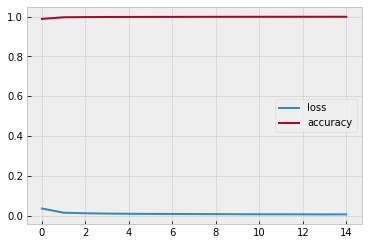

In [16]:
annmodel_loss = pd.DataFrame(annmodel.history.history)
annmodel_loss.plot()

In [17]:
score = annmodel.evaluate(x_test, y_test)
print(score)

1781/1781 [==============================] - 2s 990us/step - loss: 0.0190 - accuracy: 0.9985
[0.019033193588256836, 0.9985429048538208]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.55      0.88      0.67        98

    accuracy                           1.00     56962
   macro avg       0.77      0.94      0.84     56962
weighted avg       1.00      1.00      1.00     56962



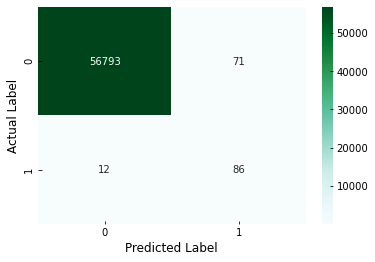

In [19]:
y_pred = annmodel.predict_classes(x_test)
c_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="BuGn", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

ANN with 3 hidden layers results in a low PRECISION (0.55).  RECALL 0.88. F1-Score 0.67

<a name='conclusion'> </a>

# 4. Conclusion

Implementation of SMOTE helped with the data imbalance and allowed for more information retention, thus allowing for less false positives on fraud cases (misclassification of non fraud as fraud). Both Random Forest and XGBoost created a good model with SMOTE. Using ANN with this dataset yielded a poor model in comparison, with lower scores for precision.

Overall, by using SMOTE and the Random Forest model, we were able to classify fraud and no fraud cases the best, at 0.87 for the f1-score.